## Assignment 05 - Submitted By

**Muhammad Raaid Khan**
**DS & AI**
**Batch-05**

## Task

Predict age, gender and ethnicity of people using any Pre-trained and UTK Face datasets


https://www.kaggle.com/datasets/jangedoo/utkface-new

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
import zipfile
zip = zipfile.ZipFile("/content/drive/My Drive/Colab Shared Files/utkface-new.zip",'r')
zip.extractall("/content/drive/My Drive/Colab Shared Files")
zip.close()

In [10]:
path = Path("/content/drive/My Drive/Colab Shared Files/UTKFace/UTKFace")
filenames = list(map(lambda x: x.name, path.glob('*.jpg')))
print(len(filenames))
print(filenames[:3])

23708
['100_0_0_20170112213500903.jpg.chip.jpg', '100_0_0_20170112215240346.jpg.chip.jpg', '100_1_0_20170110183726390.jpg.chip.jpg']


In [30]:
#Adding Randomization to Data
np.random.seed(10)
np.random.shuffle(filenames)

age_labels, gender_labels,race_labels, image_path = [], [], [], []

for filename in filenames:
    image_path.append(filename)
    temp = filename.split('_')
    age_labels.append(temp[0])
    gender_labels.append(temp[1])
    race_labels.append(temp[2])

In [31]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'],df['race'] = image_path, age_labels, gender_labels, race_labels

In [32]:
# Removing Outliers in Race
df = df[df['race'].isin(['0','1','2','3','4'])]
df['race'].value_counts()

,count
race,
0,10078
1,4526
3,3975
2,3434
4,1692


In [33]:
df.head()

,image,age,gender,race
0,23_1_2_20170116172910708.jpg.chip.jpg,23,1,2
1,28_0_1_20170113150719161.jpg.chip.jpg,28,0,1
2,26_1_0_20170116234741431.jpg.chip.jpg,26,1,0
3,37_0_3_20170119202516470.jpg.chip.jpg,37,0,3
4,60_0_0_20170109013457906.jpg.chip.jpg,60,0,0


In [35]:
gender_dict = {0:"Male",1:"Female"}
race_dict = {0:"White",1:"Black",2:"Asian",3:"Indian",4:"Others"}

In [36]:
#Converting Labels to Integers
df['gender'] = df['gender'].astype('int32')
df['age'] = df['age'].astype('int32')
df['race'] = df['race'].astype('int32')

In [37]:
df.head()

,image,age,gender,race
0,23_1_2_20170116172910708.jpg.chip.jpg,23,1,2
1,28_0_1_20170113150719161.jpg.chip.jpg,28,0,1
2,26_1_0_20170116234741431.jpg.chip.jpg,26,1,0
3,37_0_3_20170119202516470.jpg.chip.jpg,37,0,3
4,60_0_0_20170109013457906.jpg.chip.jpg,60,0,0


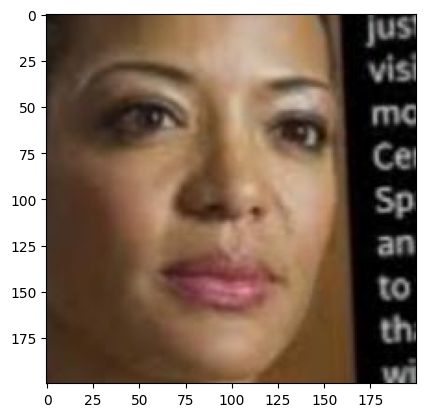

In [38]:
img = Image.open("/content/drive/My Drive/Colab Shared Files/UTKFace/UTKFace/"+df['image'][112])
plt.imshow(img)

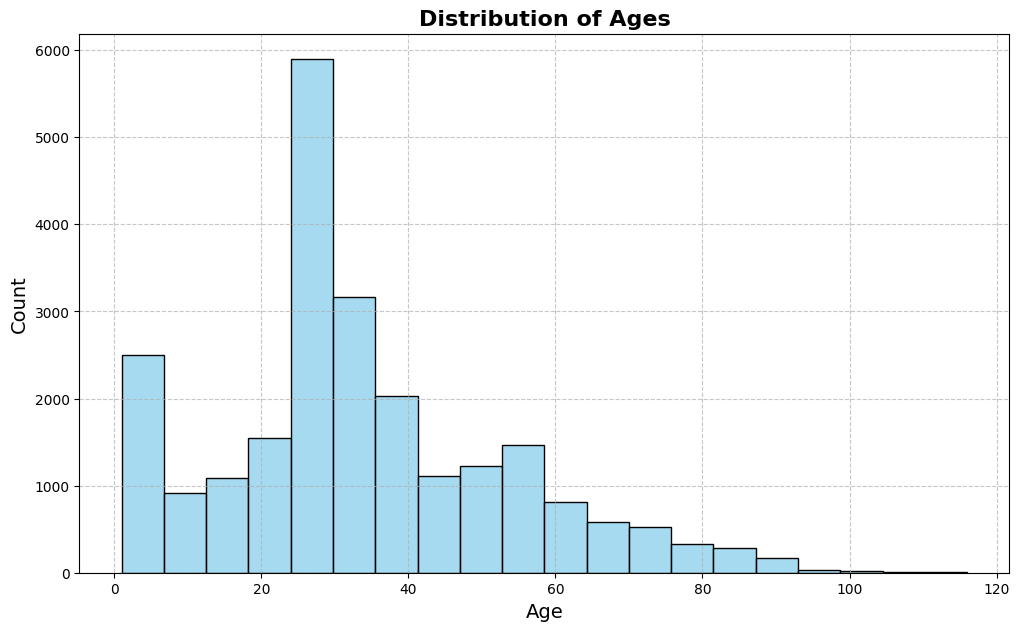

In [39]:
# Getting Age Distribution in Dataset
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))


sns.histplot(df['age'], bins=20, kde=False, color='skyblue', edgecolor='black')

plt.title('Distribution of Ages', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

<ipython-input-40-36725a16e635>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<Axes: xlabel='age', ylabel='Density'>

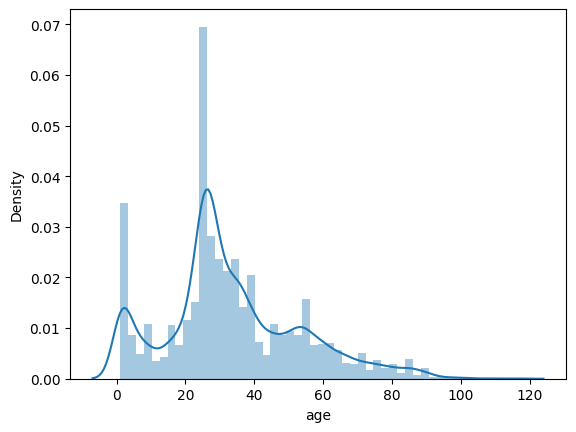

In [40]:
sns.distplot(df.age)

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')

# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

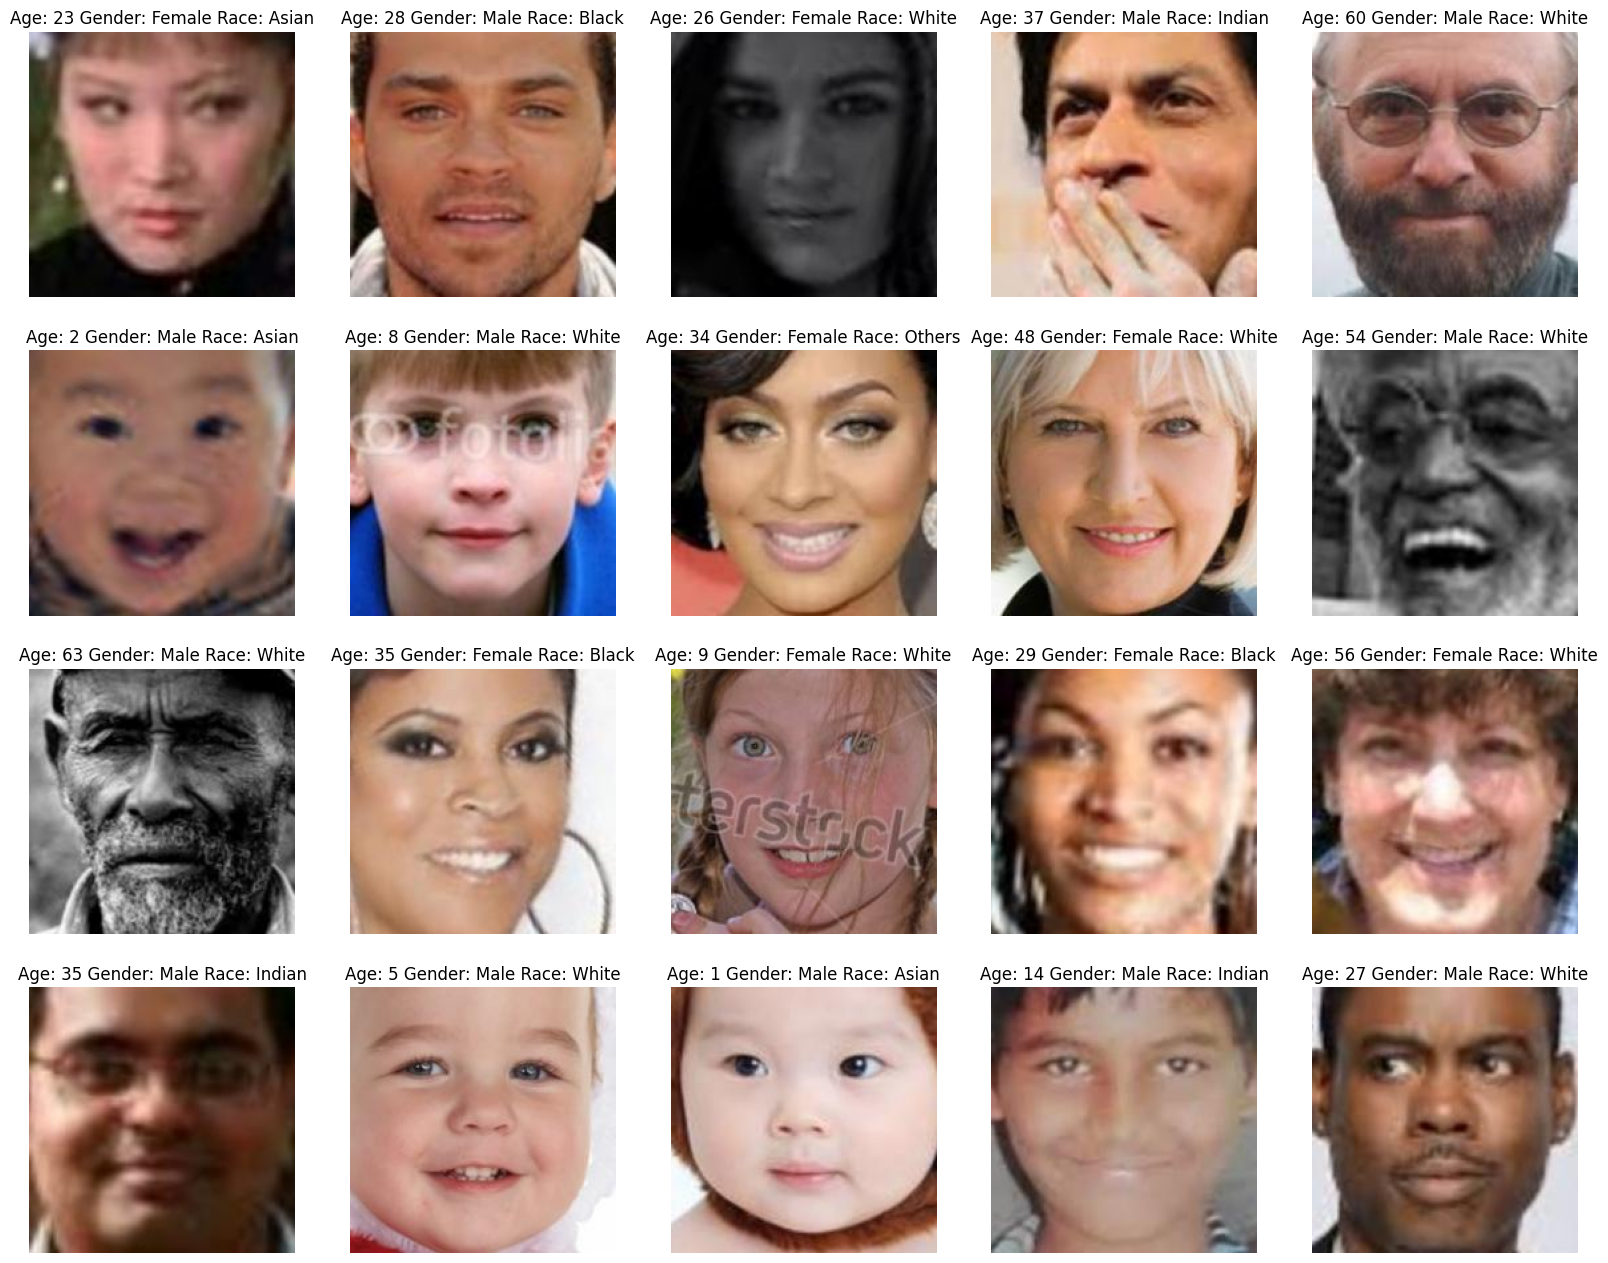

In [42]:
files = df.iloc[0:20]
plt.figure(figsize=(20,20))
for index, file, age, gender, race in files.itertuples():
    plt.subplot(5,5, index+1)
    img = load_img("/content/drive/My Drive/Colab Shared Files/UTKFace/UTKFace/"+file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender] } Race: {race_dict[race]}")
    plt.axis('off')

In [43]:
df.count()

,0
image,23705
age,23705
gender,23705
race,23705


In [44]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.8, random_state=42)

In [45]:
train.shape

(18964, 4)

In [46]:
test.shape

(4741, 4)

In [47]:
train.head()

,image,age,gender,race
21099,30_1_1_20170117131113935.jpg.chip.jpg,30,1,1
20882,30_0_1_20170117132535262.jpg.chip.jpg,30,0,1
21549,32_1_0_20170117134819735.jpg.chip.jpg,32,1,0
13630,34_1_0_20170117180013755.jpg.chip.jpg,34,1,0
8227,30_0_3_20170117150038298.jpg.chip.jpg,30,0,3


## Extracting Features

In [49]:
#converting Image to numpy array (extracting feature)
x_train = []
for file in train.image:
    img = load_img("/content/drive/My Drive/Colab Shared Files/UTKFace/UTKFace/"+file).convert('RGB')
    img = img.resize((224, 224))
    img = np.array(img)
    x_train.append(img)

x_train = np.array(x_train)

x_train = x_train.reshape(len(x_train), 224, 224, 3)

## Normalizing data

In [50]:
y_gender = np.array(train.gender)
y_age = np.array(train.age)
y_race = np.array(train.race)

In [51]:
from tensorflow.keras.utils import to_categorical

# race one-hot encoding
y_race = to_categorical(y_race, num_classes=5)

## Creating Model

In [52]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.initializers import glorot_uniform

In [53]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [54]:
# Freeze the VGG16 layers
for layer in conv_base.layers:
    layer.trainable = False

In [55]:
# Input layer
input_size = (224, 224, 3)
inputs = Input(input_size)

In [56]:
# Apply the VGG16 base model
X = conv_base(inputs)

In [57]:
# Flatten the output
X = Flatten()(X)

In [58]:
# Dense layers for shared representation
dense_1 = Dense(256, activation='relu')(X)
dropout_1 = Dropout(0.4)(dense_1)

# Dense layers specific to each task
dense_2 = Dense(256, activation='relu')(X)
dropout_2 = Dropout(0.4)(dense_2)

dense_3 = Dense(128, activation='relu')(X)
dropout_3 = Dropout(0.4)(dense_3)

# Output layers
output_1 = Dense(1, activation='sigmoid', name='gender_output')(dropout_1)  # Gender output
output_2 = Dense(1, activation='linear', name='age_output')(dropout_2)      # Age output
output_3 = Dense(5, activation='softmax', name='race_output')(dropout_3)    # Race output

model = Model(inputs=inputs, outputs=[output_1, output_2, output_3])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 7, 7, 512)      │     14,714,688 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 25088)          │              0 │ vgg16[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │      6,422,784 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 256)            │      6,422,784 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │      3,211,392 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 256)            │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 128)            │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gender_output (Dense)     │ (None, 1)              │            257 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ age_output (Dense)        │ (None, 1)              │            257 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ race_output (Dense)       │ (None, 5)              │            645 │ dropout_2[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 30,772,807 (117.39 MB)

 Trainable params: 16,058,119 (61.26 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

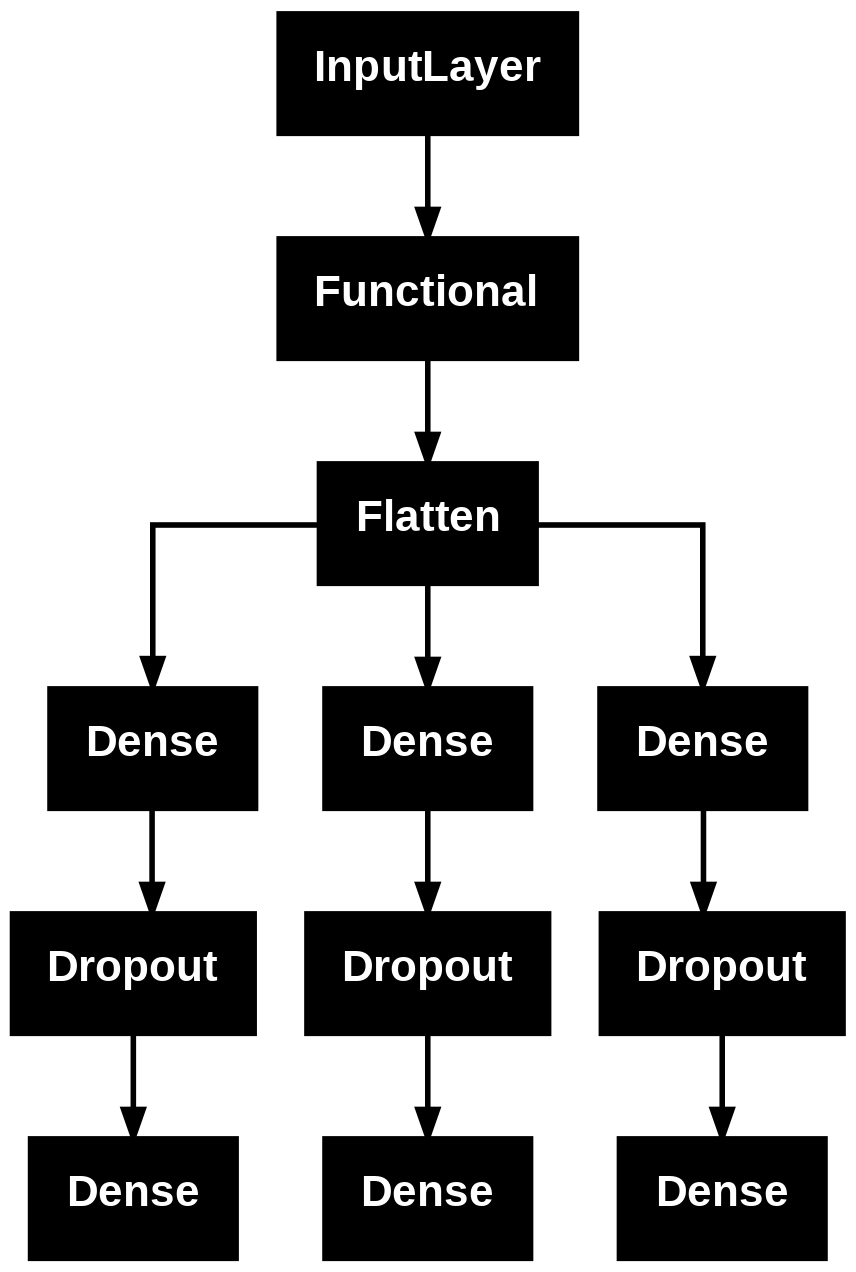

In [59]:
from keras.utils import plot_model
plot_model(model)

In [60]:
# Compile the model
model.compile(
    optimizer='adam',
    loss={
        'gender_output': 'binary_crossentropy',
        'age_output': 'mean_squared_error',
        'race_output': 'categorical_crossentropy'
    },
    metrics={
        'gender_output': 'accuracy',
        'age_output': 'mean_absolute_error',
        'race_output': 'accuracy'
    }
)

In [61]:
# Train the model
history = model.fit(
    x_train,
    {
        'gender_output': y_gender,
        'age_output': y_age,
        'race_output': y_race
    },
    epochs=5,  # Set the number of epochs as needed
    batch_size=32,  # Set the batch size as needed
    validation_split=0.1,  # Use a validation split or provide validation data
)

Epoch 1/5
534/534 ━━━━━━━━━━━━━━━━━━━━ 117s 183ms/step - age_output_mean_absolute_error: 25.2489 - gender_output_accuracy: 0.7667 - loss: 2135.1748 - race_output_accuracy: 0.4073 - val_age_output_mean_absolute_error: 14.9199 - val_gender_output_accuracy: 0.8809 - val_loss: 363.3483 - val_race_output_accuracy: 0.3985
Epoch 2/5
534/534 ━━━━━━━━━━━━━━━━━━━━ 111s 156ms/step - age_output_mean_absolute_error: 17.7805 - gender_output_accuracy: 0.8802 - loss: 647.6561 - race_output_accuracy: 0.4261 - val_age_output_mean_absolute_error: 14.4328 - val_gender_output_accuracy: 0.8898 - val_loss: 341.6536 - val_race_output_accuracy: 0.3985
Epoch 3/5
534/534 ━━━━━━━━━━━━━━━━━━━━ 81s 151ms/step - age_output_mean_absolute_error: 17.2435 - gender_output_accuracy: 0.8867 - loss: 632.9532 - race_output_accuracy: 0.4235 - val_age_output_mean_absolute_error: 12.6942 - val_gender_output_accuracy: 0.8877 - val_loss: 287.5381 - val_race_output_accuracy: 0.3985
Epoch 4/5
534/534 ━━━━━━━━━━━━━━━━━━━━ 84s 155ms/

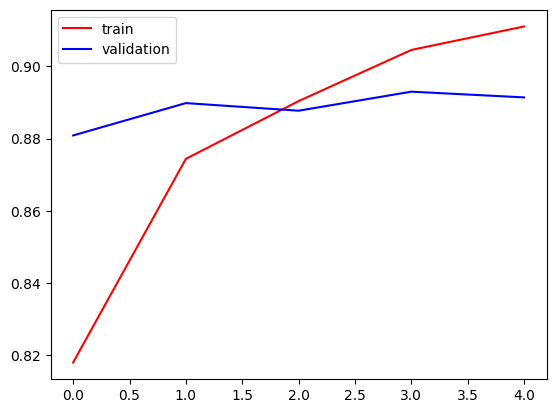

In [62]:
import matplotlib.pyplot as plt

plt.plot(history.history['gender_output_accuracy'],color='red',label='train')
plt.plot(history.history['val_gender_output_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

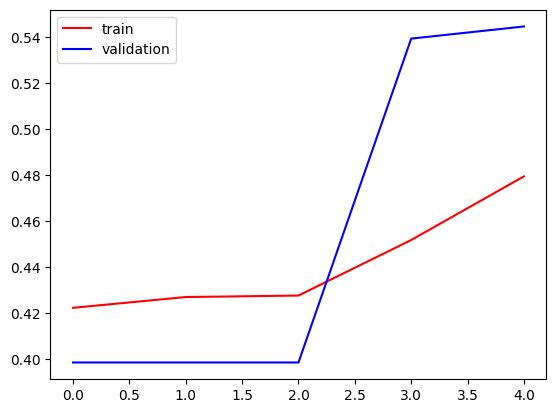

In [63]:
plt.plot(history.history['race_output_accuracy'],color='red',label='train')
plt.plot(history.history['val_race_output_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

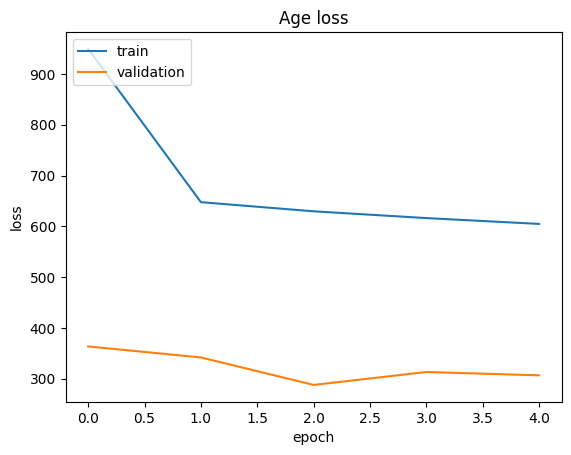

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Age loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Original: Gender =  Female  Age =  35  Race =  Asian
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction: Gender =  Female  Age =  19  Race =  Black


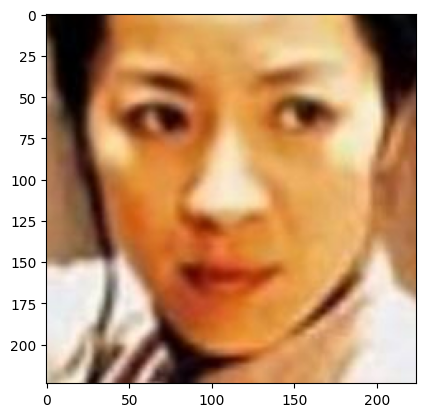

In [66]:
index=20
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index]," Race = ", race_dict[np.argmax(y_race[index])])

pred = model.predict(x_train[index].reshape(1, 224, 224, 3))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
pred_race = race_dict[round(np.argmax(pred[2][0]))]

print("Prediction: Gender = ", pred_gender," Age = ", pred_age," Race = ", pred_race)
plt.imshow(x_train[index].reshape(224, 224, 3))

Original: Gender =  Female  Age =  25  Race =  Asian
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction: Gender =  Female  Age =  14  Race =  Black


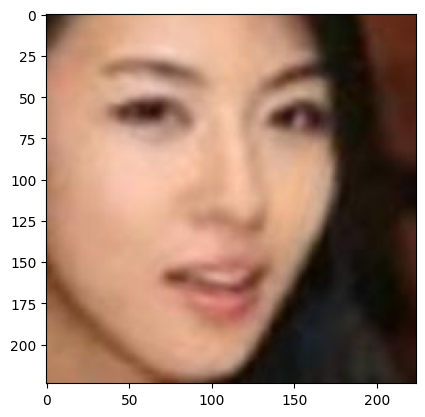

In [67]:
index=125
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index]," Race = ", race_dict[np.argmax(y_race[index])])

pred = model.predict(x_train[index].reshape(1, 224, 224, 3))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
pred_race = race_dict[round(np.argmax(pred[2][0]))]

print("Prediction: Gender = ", pred_gender," Age = ", pred_age," Race = ", pred_race)
plt.imshow(x_train[index].reshape(224, 224, 3))

Original: Gender =  Male  Age =  74  Race =  White
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction: Gender =  Male  Age =  38  Race =  White


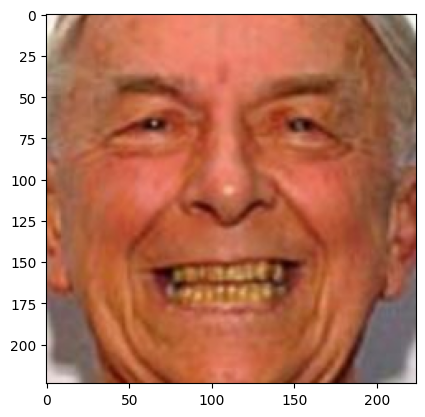

In [68]:
index=3525
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index]," Race = ", race_dict[np.argmax(y_race[index])])

pred = model.predict(x_train[index].reshape(1, 224, 224, 3))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
pred_race = race_dict[round(np.argmax(pred[2][0]))]

print("Prediction: Gender = ", pred_gender," Age = ", pred_age," Race = ", pred_race)
plt.imshow(x_train[index].reshape(224, 224, 3))

Original: Gender =  Female  Age =  29  Race =  Asian
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction: Gender =  Female  Age =  22  Race =  White


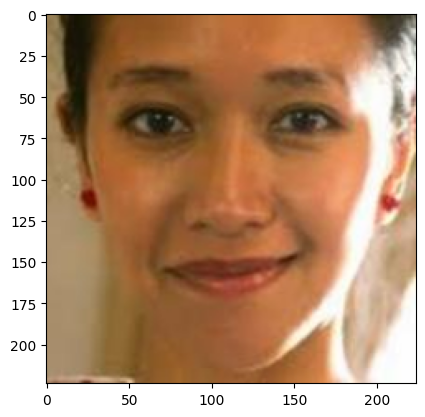

In [69]:
index=2175
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index]," Race = ", race_dict[np.argmax(y_race[index])])

pred = model.predict(x_train[index].reshape(1, 224, 224, 3))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
pred_race = race_dict[round(np.argmax(pred[2][0]))]

print("Prediction: Gender = ", pred_gender," Age = ", pred_age," Race = ", pred_race)
plt.imshow(x_train[index].reshape(224, 224, 3))